In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Mohan\AppData\Local\Temp\ipykernel_12068\695354703.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [36]:
RFMfull=pd.read_csv("rfmupdated.csv")
RFM=RFMfull[['Customer ID', 'Recency', 'Frequency', 'Monetary']]
RFMfull

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster_Id
0,0,9,1,1499.11,1,4,1,141,6,0
1,1,25,1,818.10,2,4,3,243,9,0
2,2,68,1,973.21,3,4,2,342,9,1
3,3,81,1,842.86,4,4,2,442,10,1
4,4,43,1,933.33,2,4,2,242,8,2
...,...,...,...,...,...,...,...,...,...,...
98705,100552,64,1,277.14,3,4,4,344,11,1
98706,100553,15,1,541.90,1,4,4,144,9,0
98707,100554,75,2,2214.28,4,1,1,411,6,4
98708,100555,42,1,411.43,2,4,4,244,10,2


In [37]:
RFMfull

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster_Id
0,0,9,1,1499.11,1,4,1,141,6,0
1,1,25,1,818.10,2,4,3,243,9,0
2,2,68,1,973.21,3,4,2,342,9,1
3,3,81,1,842.86,4,4,2,442,10,1
4,4,43,1,933.33,2,4,2,242,8,2
...,...,...,...,...,...,...,...,...,...,...
98705,100552,64,1,277.14,3,4,4,344,11,1
98706,100553,15,1,541.90,1,4,4,144,9,0
98707,100554,75,2,2214.28,4,1,1,411,6,4
98708,100555,42,1,411.43,2,4,4,244,10,2


In [41]:
final = RFMfull.groupby("Cluster_Id")[["Recency", "Frequency", "Monetary"]].mean()

final


# Cluster 1:
# Moderate Recency, Moderate Frequency, Moderate Monetary: Stable and Moderate Customers
# Cluster 2:
# Very High Frequency, Very High Monetary: Highly Active and Valuable Customers
# Cluster 3:
# High Recency, Low Frequency, Low Monetary: At-Risk or Dormant Customers
# Cluster 4:
# High Recency, Low Frequency, Low Monetary: Potential Churn or Inactive Customers

,Recency,Frequency,Monetary
Cluster_Id,,,
0,13.505237,1.184300,915.336015
1,75.017139,1.052628,752.105175
2,44.252047,1.075632,795.047345
3,20.116893,3.786190,3012.221852
4,60.441112,2.375787,1884.107177


In [44]:
result=RFMfull.Cluster_Id.value_counts()
result

Cluster_Id
1    33024
0    27211
2    27118
4     7302
3     4055
Name: count, dtype: int64

<Axes: ylabel='Cluster_Id'>

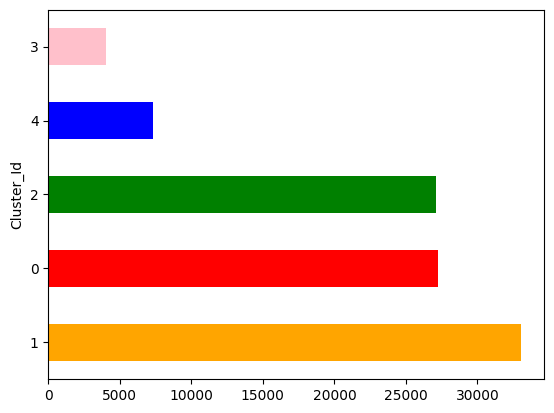

In [45]:
result.plot(kind="barh", color=["Orange","Red","Green","blue","pink"])

In [46]:
RFMfull

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster_Id
0,0,9,1,1499.11,1,4,1,141,6,0
1,1,25,1,818.10,2,4,3,243,9,0
2,2,68,1,973.21,3,4,2,342,9,1
3,3,81,1,842.86,4,4,2,442,10,1
4,4,43,1,933.33,2,4,2,242,8,2
...,...,...,...,...,...,...,...,...,...,...
98705,100552,64,1,277.14,3,4,4,344,11,1
98706,100553,15,1,541.90,1,4,4,144,9,0
98707,100554,75,2,2214.28,4,1,1,411,6,4
98708,100555,42,1,411.43,2,4,4,244,10,2


In [47]:
print('Loyal Customers: ',len(RFMfull[RFMfull['F']==4]))

Loyal Customers:  78728


In [48]:
print("Big Spenders: ",len(RFMfull[RFMfull['M']==4]))

Big Spenders:  24737


In [53]:
# Cluster 0:
# Low Recency, High Frequency, High Monetary: Likely Engaged
# Cluster 1:
# Moderate Recency, Moderate Frequency, Moderate Monetary: Neutral
# Cluster 2:
# Very High Frequency, Very High Monetary: Likely Engaged
# Cluster 3:
# High Recency, Low Frequency, Low Monetary: Likely Churn
# Cluster 4:
# High Recency, Low Frequency, Low Monetary: Likely Churn
def label(x):
    if x == 0 or x == 1 or x==2:
        return "1"
    else:
        return "0"

RFMfull.loc[:, "Churn"] = RFMfull["Cluster_Id"].apply(label)
RFMfull

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster_Id,Churn
0,0,9,1,1499.11,1,4,1,141,6,0,1
1,1,25,1,818.10,2,4,3,243,9,0,1
2,2,68,1,973.21,3,4,2,342,9,1,1
3,3,81,1,842.86,4,4,2,442,10,1,1
4,4,43,1,933.33,2,4,2,242,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...
98705,100552,64,1,277.14,3,4,4,344,11,1,1
98706,100553,15,1,541.90,1,4,4,144,9,0,1
98707,100554,75,2,2214.28,4,1,1,411,6,4,0
98708,100555,42,1,411.43,2,4,4,244,10,2,1


###  churn

In [54]:
X = RFMfull[['Recency', 'Frequency', 'Monetary']]  # Features
y = RFMfull['Churn']  # Target variable

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Build the Random Forest classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict churn on the testing set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9991220072265559

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3348
           1       1.00      1.00      1.00     26265

    accuracy                           1.00     29613
   macro avg       1.00      1.00      1.00     29613
weighted avg       1.00      1.00      1.00     29613


Confusion Matrix:
 [[ 3337    11]
 [   15 26250]]


In [ ]:
# Cluster 0:
# Low Recency, Low Frequency, Low Monetary: Likely Churn
# Cluster 1:
# High Recency, Low Frequency, Low Monetary: Likely Churn
# Cluster 2:
# Moderate Recency, Low Frequency, Low Monetary: Likely Churn
# Cluster 3:
# Low Recency, High Frequency, High Monetary: Likely Engaged
# Cluster 4:
# Moderate Recency, Moderate Frequency, Moderate Monetary: Neutral